### Import all libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from collections import Counter
from scipy import stats
import pycountry

### Load and Check Data

In [3]:
suicide_df=pd.read_csv('Suicide Data.csv')
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicide_df.shape

(27820, 12)

In [5]:
print("Following are the columns of the dataset")
suicide_df.columns

Following are the columns of the dataset


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
suicide_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Check null values

In [7]:
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

#### Remove which we dont need

In [8]:
del suicide_df['country-year']
del suicide_df['HDI for year']

In [9]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


### Now that we have cleaned our data. Next step is to remove outliers from our dataset.

In [10]:
# This is a fnction to detect the outliers
def detect_outliers(df,columnNames):
    #df=dataframe for example suicide_rates
    outlier_indices=[]
    for c in columnNames:
        #1st Quartile
        Q1=np.percentile(df[c],25)
        #3rd Quartile
        Q3=np.percentile(df[c],75)
        #IQR
        IQR=Q3-Q1
        #Outlier Step
        outlier_step=IQR * 1.5
        #detect outlier and ther indices
        outlier_list_col=df[(df[c]<Q1-outlier_step) | (df[c]>Q3+outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v>1)
    return multiple_outliers

In [11]:
suicide_df.loc[detect_outliers(suicide_df,['population','gdp_per_capita ($)','suicides/100k pop'])]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
9087,France,1985,male,55-74 years,2363,4471600,52.84,"553,138,414,367",10765,G.I. Generation
9088,France,1985,male,35-54 years,2752,6799400,40.47,"553,138,414,367",10765,Silent
9099,France,1986,male,55-74 years,2382,4450700,53.52,"771,470,783,218",14940,G.I. Generation
9100,France,1986,male,35-54 years,2847,6825300,41.71,"771,470,783,218",14940,Silent
9111,France,1987,male,55-74 years,2198,4576100,48.03,"934,173,305,686",17999,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...
24918,Switzerland,2011,male,75+ years,125,243790,51.27,"699,579,638,638",93053,Silent
24930,Switzerland,2012,male,75+ years,129,250132,51.57,"668,043,614,123",87951,Silent
24942,Switzerland,2013,male,75+ years,146,256661,56.88,"688,504,173,431",89634,Silent
24954,Switzerland,2014,male,75+ years,144,267638,53.80,"709,182,559,935",90809,Silent


#### Lets drop those outliers

In [12]:
suicide_df=suicide_df.drop(detect_outliers(suicide_df,['population','gdp_per_capita ($)','suicides/100k pop']),axis=0).reset_index(drop=True)

In [13]:
suicide_df.shape

(27494, 10)

### Lets find out In which year did the most suicides occur

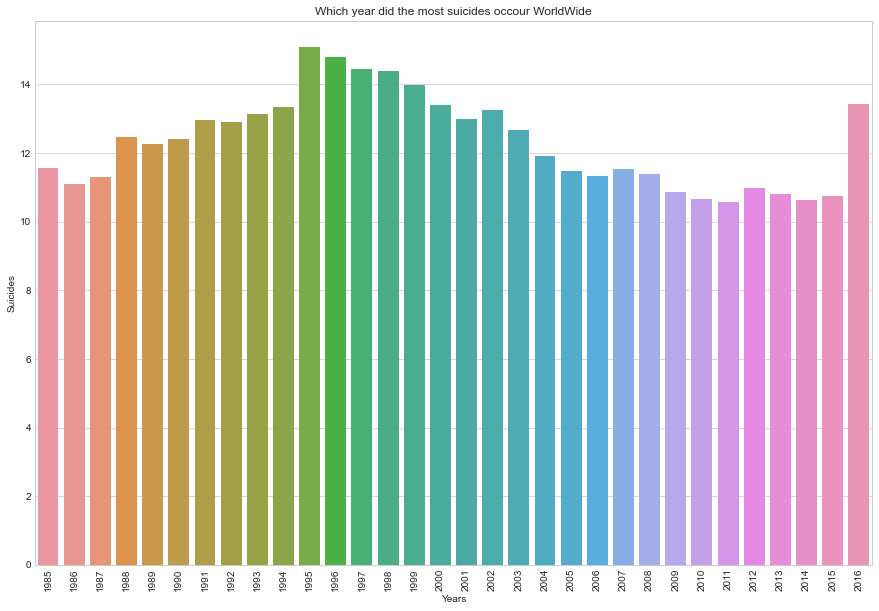

<Figure size 432x288 with 0 Axes>

In [14]:
year_list=list(suicide_df.year.unique())
year_suicide_ratio=[]
for i in year_list:
    a=suicide_df[suicide_df['year']==i]
    year_suicide_df=sum(a['suicides/100k pop'])/len(a)
    year_suicide_ratio.append(year_suicide_df)
data=pd.DataFrame({'year_list':year_list,'year_suicide_ratio':year_suicide_ratio})
new_index=(data['year_suicide_ratio'].sort_values(ascending=True)).index.values
sorted_data=data.reindex(new_index)


# Lets plot the result
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['year_list'],y=sorted_data['year_suicide_ratio'])
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Suicides')
plt.title('Which year did the most suicides occour WorldWide')
plt.show()

Graph shows that most suicides occured in 1995

### Ratio of Age of people that committed suicide

In [15]:
suicide_age = suicide_df[['age','suicides/100k pop']].groupby(['age'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)
suicide_age

,age,suicides/100k pop
5,75+ years,23.605415
4,55-74 years,15.233734
2,35-54 years,13.997291
1,25-34 years,11.815363
0,15-24 years,8.793549
3,5-14 years,0.619707


### Lets plot the result 

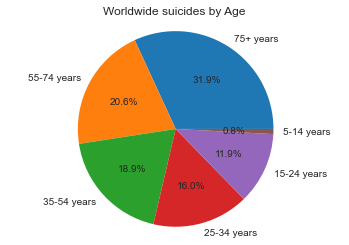

In [16]:
fig1, ax1 = plt.subplots()
plt.pie(suicide_age['suicides/100k pop'], labels=suicide_age['age'], autopct='%1.1f%%')
plt.title('Worldwide suicides by Age')
plt.axis('equal')
plt.show()

The Above plot shows that the suicide rate increases as age increases no matter the year, Age is a important factor in increased number of suicides

### Lets check the suicides ratio by sex

In [17]:
suicide_sex= suicide_df[['sex', 'suicides/100k pop']].groupby(['sex'], as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)
suicide_sex

,sex,suicides/100k pop
1,male,19.411135
0,female,5.380834


Text(0.5, 1.0, 'Worldwide suicides by Gender')

<Figure size 720x360 with 0 Axes>

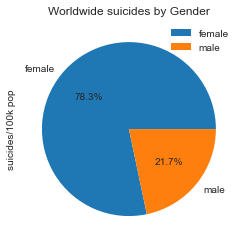

In [18]:
fig = plt.figure(figsize=(10,5))
labels = 'female','male'
suicide_sex.plot(kind='pie',labels=labels, y = 'suicides/100k pop', autopct='%1.1f%%')
plt.title('Worldwide suicides by Gender')

The result is clear no matter the year the suicides number of male is about 4 times higher than that of female.

### Suicide Ratio by generation

In [19]:
suicide_generation = suicide_df[['generation','suicides/100k pop']].groupby(['generation'],as_index=False).mean().sort_values(by='suicides/100k pop',ascending=False)
suicide_generation

,generation,suicides/100k pop
1,G.I. Generation,23.607357
5,Silent,17.682384
0,Boomers,13.847951
2,Generation X,10.216633
4,Millenials,5.270591
3,Generation Z,0.641310


Before 2000, we can see that the highest suicide rate is G.I. generation, and this generation is also known as WW2 generation. They suffered from the worldwide great depression before WW2, at this time, the income, profit, taxes are decreased seriously, so this generation experienced economic and social turmoil.

Did this kind of social impact affect the suicide rate of G.I. generation? Compare to the Silent generation after 2000, the suicide rate is not that high. 

Interestingly, the suicide rate of Generation X and Millenials increase step by step. Besides, the suicide rate increases rapidly once the average age of generation is over 20. Does it mean that the suicide rate of young persons rise when they are independent of their parents? In other words, healthy family is helpful to the suicide rate. Let's take a look.

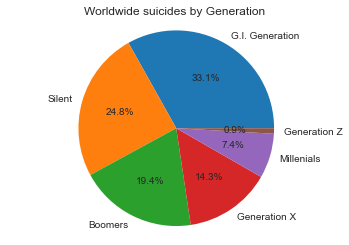

In [20]:
fig1, ax1 = plt.subplots()
plt.pie(suicide_generation['suicides/100k pop'], labels=suicide_generation['generation'], autopct='%1.1f%%')
plt.title('Worldwide suicides by Generation')
plt.axis('equal')
plt.show()

### Which country has the highest suicide rate for the 100,000 population

In [21]:
suicide_100k=[]
country=[]
for i in range(len(suicide_df['country'].unique())-1):
    country.append(suicide_df['country'].unique()[i])
    suicide_100k.append(suicide_df[suicide_df['country']==suicide_df['country'].unique()[i]]['suicides/100k pop'].sum())

In [22]:
suicide_100k_data={'country':country, 'suicide_100k':suicide_100k}
suicide_100k_dataset=pd.DataFrame(suicide_100k_data)
sorted_suicide_100k_dataset= suicide_100k_dataset.sort_values(by=['suicide_100k'], ascending=False)

Text(0.5, 1.0, 'Suicide Number/100k pop')

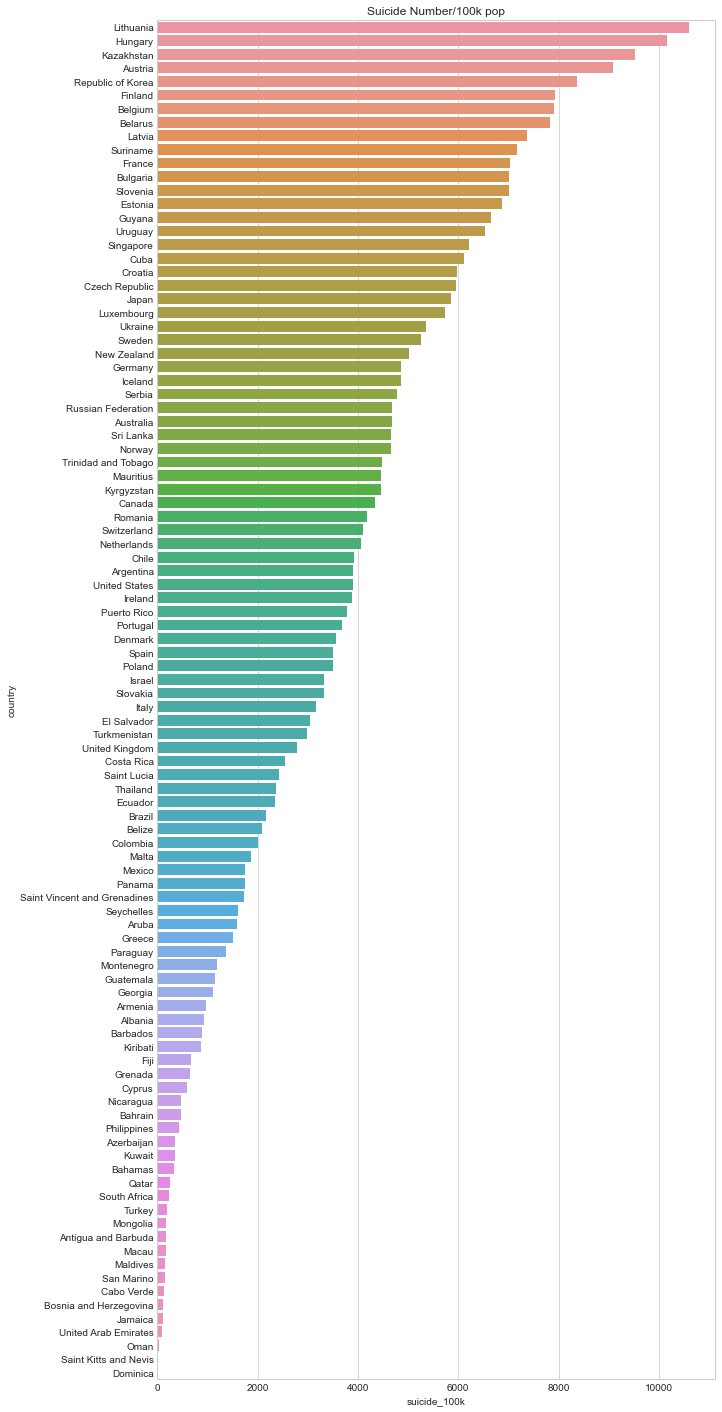

In [23]:
fig = plt.figure(figsize=(10,25))
sns.barplot(y= 'country', x= 'suicide_100k', data=sorted_suicide_100k_dataset)
plt.title("Suicide Number/100k pop")

 <font color='blue'>  
Why Lithuania's suicide rate is much higher than in other countries???

For a number of reasons:
* the sun does not shine.
* the weather is rainy.
* high alcohol consumption.


Why Sri Lanka's suicide rate is much higher than in other countries???
* Unfortunately, purely for economic reasons...:(

Why Hungary's suicide rate is much higher than in other countries???

* Radio Free Europe, an American station broadcasting to Hungary, puts the blame for the high suicide rate on the failings of Hungary's Communist system.

#### We'll map the suicide rate, so first we need to transfer the country name into country code.
* We choose alpha3 country code.

In [24]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

We arange the country list and see how many countries are in the dataset, then calculate the suicide rate of countries.

In [25]:
df1 = suicide_df.groupby("country")["suicides_no"].sum()
country_name = list(df1.index.get_level_values(0))
country_not_in_list = [i for i in country_name[:] if i not in countries.keys()]
country_not_in_list

['Czech Republic',
 'Macau',
 'Republic of Korea',
 'Saint Vincent and Grenadines']

We found that there are four country names are different, so we rename these names.

In [26]:
suicide_df.replace("Republic of Korea", "Korea, Republic of", inplace = True)
suicide_df.replace('Czech Republic', "Czechia", inplace = True)
suicide_df.replace('Macau', 'Macao', inplace = True)
suicide_df.replace('Saint Vincent and Grenadines', "Saint Vincent and the Grenadines", inplace = True)

Before ploting the suicide rate of each countries, we calcuate the suicide rate for each year, and then take the average of number as rate.

In [27]:
df_suino = suicide_df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = suicide_df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum

country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

For top 10, seven tenth were former Soviet Union countries, located in eastern europe and Russia. Japan and Korea are also high-suicide-rate countries. Let's talk about the disintegration of Soviet Union.

#### Firstly, see what happened to the suicide rate year by year.

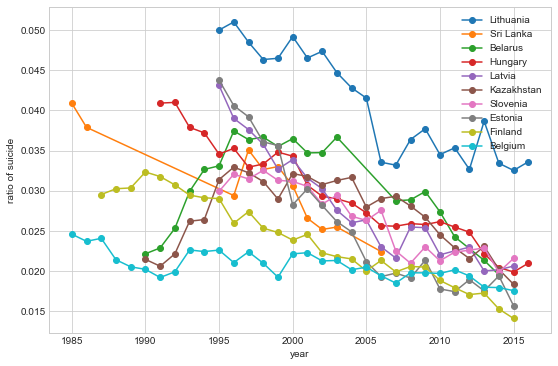

In [28]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

It's clearly that the suicide rate of some top10 countries dramatically increased after 1990. In addition, the rate in others are still high during 1990 to 2000. The transition to the economy and democracy in former Soviet Union countries may be the main reasons. Although there have been numerous studies of the increase in mortality, such as alcoholism, economic hardship, despression and so on, but there is still no one accepted as the most significant factor of the mortality crisis. Let's find out.

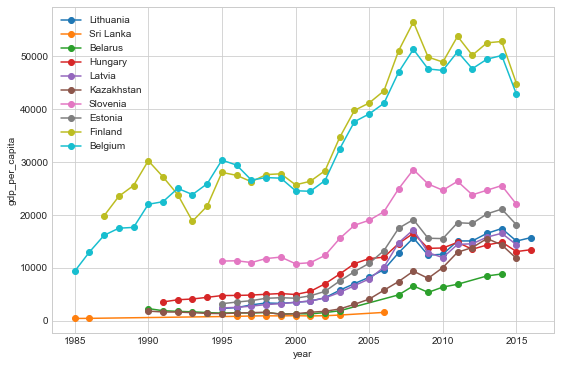

In [29]:
plt.figure(figsize = (9,6))
df_gdp = suicide_df.groupby(["country","year"])["gdp_per_capita ($)"].mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

From this image we can see that the gdp_per_capita has no differece during 1990 to 2000. In other words, the economic situation were remain stagnant and  some countries got worse until 2002, after 2005, all countries' gdp start growing. 

We also know that the whole gdp_per_capita dropped within 2008 because of the financial crisis.  However, these ratio were still better than that before 2000. To see the relationship between suicide rate and gdp_per_capita, we plot the regression plot of two parameters. 

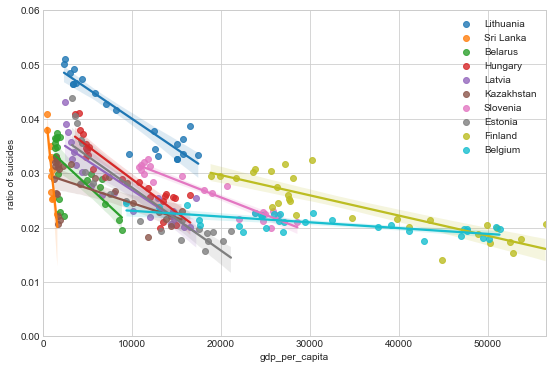

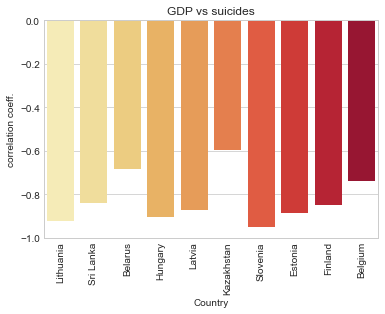

In [30]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.06)
plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

This shows that suicide rate is highly correlated to the gdp_per_capita of top 10 countries. Let's find out whether others have the same trend. 

/Users/arslanbutt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/arslanbutt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/arslanbutt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


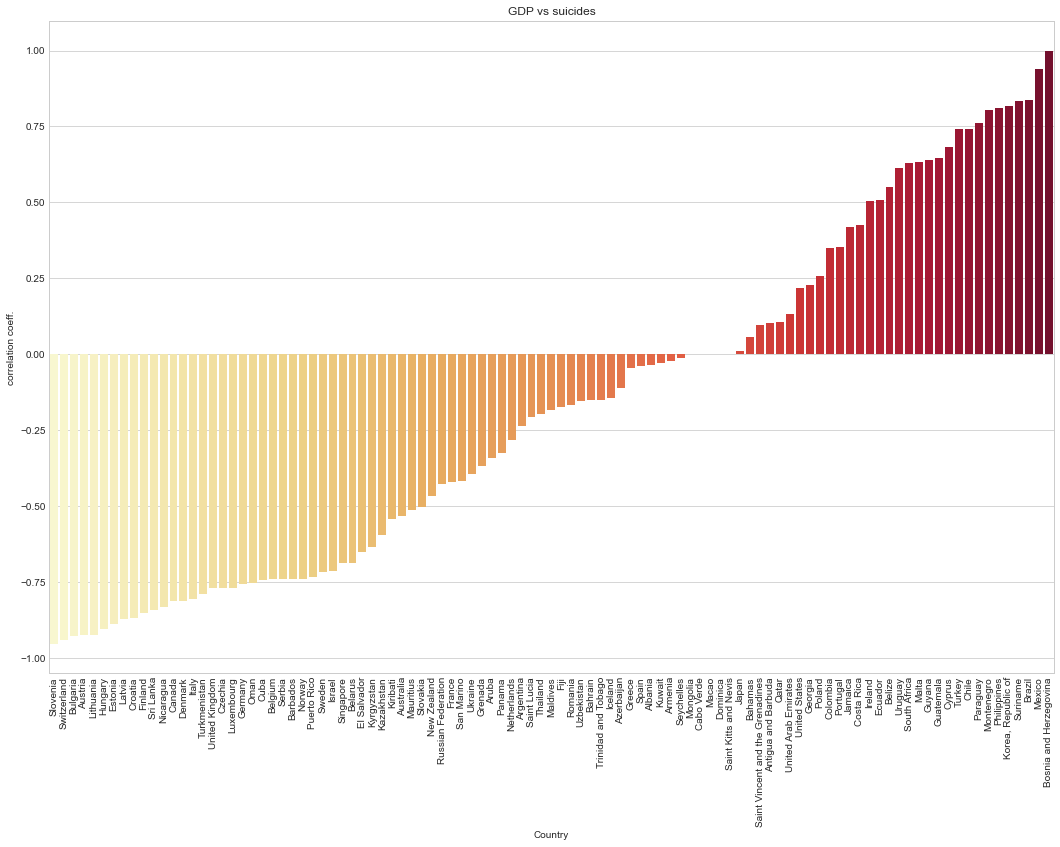

In [31]:
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

Lots of countries' suicide rate are negatively high related to gdp_per_capita, but there are some countries have opposite outcome. It's impressive.

Next, we calculate how many countries with correlation coefficient below -0.6 . 

In [32]:
high_relation_gdp = {a:b for a,b in dgp_relation.items() if b <= -0.6}
print(len(high_relation_gdp))
high_relation_gdp

33


{'Slovenia': -0.9529455791278115,
 'Switzerland': -0.9404974425902685,
 'Bulgaria': -0.9287679102475701,
 'Austria': -0.9259200512084546,
 'Lithuania': -0.9239757987267332,
 'Hungary': -0.9040354533627301,
 'Estonia': -0.8871441228139314,
 'Latvia': -0.8730699831833395,
 'Croatia': -0.8688905854455011,
 'Finland': -0.8510603475107353,
 'Sri Lanka': -0.8423723520534465,
 'Nicaragua': -0.8339461195785591,
 'Canada': -0.8137269827924933,
 'Denmark': -0.8123474418661457,
 'Italy': -0.8058989652804354,
 'Turkmenistan': -0.789798470389873,
 'United Kingdom': -0.7709229981372079,
 'Czechia': -0.7706689026781656,
 'Luxembourg': -0.7700728928325253,
 'Germany': -0.7567584036061585,
 'Oman': -0.7547353920453065,
 'Cuba': -0.7437036777206897,
 'Belgium': -0.7416790406841788,
 'Serbia': -0.7411928190991895,
 'Barbados': -0.7409526707249006,
 'Norway': -0.7406431335510837,
 'Puerto Rico': -0.7337807666130007,
 'Sweden': -0.7157635369950573,
 'Israel': -0.7139512726937896,
 'Singapore': -0.686780295

About one third countries have high relationship with gdp_per_capita. We can say that gdp is another reason of high suicide rate.

Following are the countries which relation coefficient are higher than 0.6 .

In [33]:
positive_relation_gdp = {a:b for a,b in corr_eff.items() if b > 0.6}
positive_relation_tup = list(positive_relation_gdp.items())
positive_relation_tup.sort(key= lambda pair:pair[1], reverse = True)
positive_relation = {a[0]:a[1] for a in positive_relation_tup}
print(len(positive_relation))
positive_relation

16


{'Bosnia and Herzegovina': 0.9999999999999999,
 'Mexico': 0.9392731898535472,
 'Brazil': 0.8356111067311864,
 'Suriname': 0.8333078326024657,
 'Korea, Republic of': 0.818729029471287,
 'Philippines': 0.8099497394094539,
 'Montenegro': 0.8042382321252367,
 'Paraguay': 0.7599968993976424,
 'Chile': 0.7412265208253951,
 'Turkey': 0.7398789818429371,
 'Cyprus': 0.6812947745988278,
 'Guatemala': 0.6460477591267608,
 'Guyana': 0.6379567025207803,
 'Malta': 0.6334189190517482,
 'South Africa': 0.6287573335302014,
 'Uruguay': 0.61206046817105}

Let's take a look at suicide rate and gdp_per_capita of these countries.

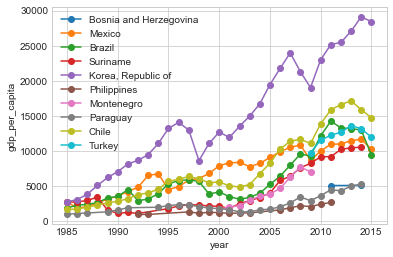

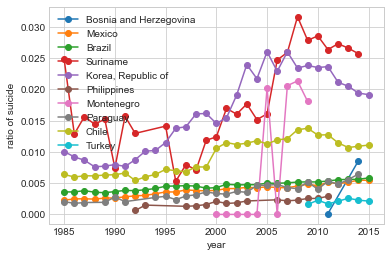

In [34]:
city_list = list({a:b for a,b in positive_relation.items()})
for country in city_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

for country in city_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

It's weird that the gdp_per_capita and suicide rate of Korea are growing faster. Does it mean that there are social problems that cause the situation like that!? 

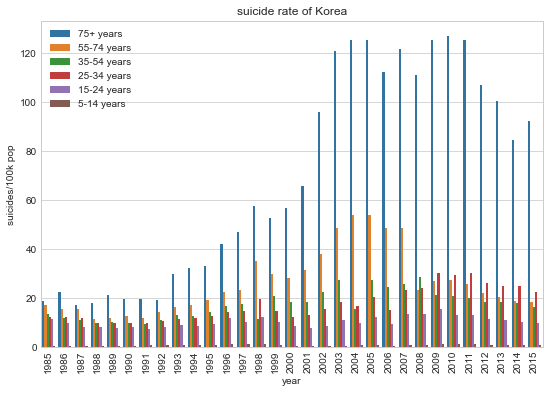

In [35]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides/100k pop", hue="age",
            ci = None,data = (suicide_df[suicide_df["country"] == "Korea, Republic of"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Korea" )
plt.legend()    
plt.show()

What's going on with old people in Korea!? After 2000, the suicide rate of people over 75 years old is almost double. Was Korea society not friendly to the old people or the enviroment depressed the old people? As we mentioned early, age is a factor of high suicide rate. A country should setup social welfare to take care of old people just in case.

On the other hand, the rate of people whose age is over 24 are growing after 1992. This phenomenon reflects the increasing burden on society, like salary,  academic pressure, family and so on.

Last but not least, how about the countries with high suicide rate not related to the gdp_per_capita!? Let's see which countries meet the condition.

In [36]:
without_relation_gdp = {a:b for a,b in corr_eff.items() if -0.3 < b < 0.3}
no_relation_gdp = [i for i in country_list[:20] if i in without_relation_gdp.keys()]
no_relation_gdp

['Mongolia', 'Japan']

Plot the age structure of Japan.

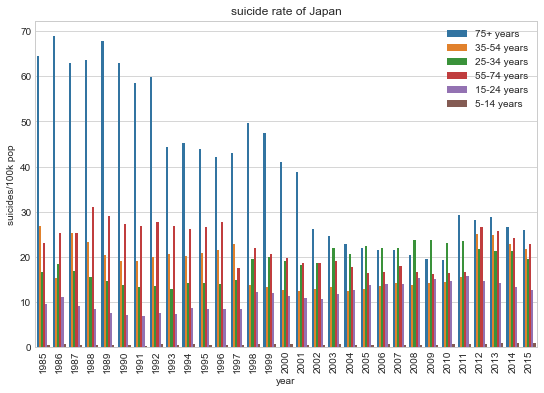

In [37]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides/100k pop", hue="age",
            ci = None,data = (suicide_df[suicide_df["country"] == "Japan"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of Japan" )
plt.legend()    
plt.show()

Although the suicide rate of the elderly has improved, the rate of young people is still not low. This shows that the social pressure haven't been relieved.

## Conclusion
In general, the suicide rate is related to several factors. First, national GDP per person. We have seen that the suicide rate in many countries is highly correlated with the gdp of the whole country, which shows that the degree of national wealth has a certain degree of reduction in suicide rate.

Second, the age. According to the suicide rate of each level of age, the rate of elderly is higher, so young people should care more about the elderly. Moreover, the country welfare of the elderly may also impact the rate.

Third, the social pressure. A healthy society can make citizens feel safe and satisfied, so how to relieve the social pressure becomes a significant topic for every country. Our purpose is not only reduce the suicide rate but also to build a better world.